# Deep Convolutional Neural Networks 

In this assignment, we will be using the Keras library to build, train, and evaluate some *relatively simple* Convolutional Neural Networks to demonstrate how adding layers to a network can improve accuracy, yet are more computationally expensive. 

The purpose of this assignment is for you to demonstrate understanding of the appropriate structure of a convolutional neural network and to give you an opportunity to research any parameters or elements of CNNs that you don't fully understand.

We will be using the cifar100 dataset for this assignment, however, in order to keep the dataset size small enough to be trained in a reasonable amount of time in a Google Colab, we will only be looking at two classes from the dataset - cats and dogs.

![CNN Structure Diagram](http://www.ryanleeallred.com/wp-content/uploads/2018/06/CNN-diagram.jpeg)


Using TensorFlow backend.


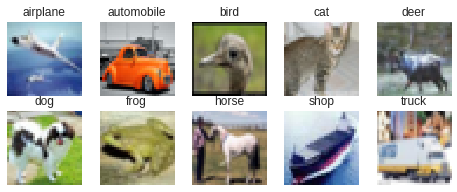

y_train length: 10000
x_train length: 10000
y_test length: 2000
x_test length: 2000


In [1]:
# Import important libraries and methods
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as K

if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

# Important Hyperparameters
batch_size = 32 
num_classes = 2
epochs = 100

# Plot sample image from each cifar10 class.
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','shop','truck']
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

x_train = x_train[train_picks]
x_test = x_test[test_picks]

# check for image_data format and format image shape accordingly
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

# Check train and test lengths
print('y_train length:', len(y_train))
print('x_train length:', len(x_train))
print('y_test length:', len(y_test))
print('x_test length:', len(x_test))

# Model #1

This model will be almost as simple as we can make it. It should look something like:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final dropout layer
---
*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)


Then compile the model using categorical_crossentropy as your loss metric. Use the Adam optimizer, and accuracy as your overall scoring metric. 

If you're lost when you get to this point, make sure you look at the lecture colab for somewhat similar sample code.



In [2]:
x_train.shape

(10000, 3, 32, 32)

In [3]:
model1 = Sequential()
model1.add(Conv2D(8, (3,3), activation='relu', input_shape=(3, 32, 32)))
model1.add(Dropout(.25))
model1.add(Conv2D(16, (3,3), activation='relu'))
model1.add(Dropout(.25))
model1.add(MaxPooling2D((2,2)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 30, 30)         224       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 30, 30)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 28, 28)        1168      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 28, 28)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 14, 14)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                200768    
__________

In [0]:
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

## Fit your model

Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

In [5]:
model1_training = model1.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 2s 242us/step - loss: 0.6852 - acc: 0.5547 - val_loss: 0.6672 - val_acc: 0.6120
Epoch 2/50
9000/9000 [==============================] - 1s 126us/step - loss: 0.6545 - acc: 0.6166 - val_loss: 0.6417 - val_acc: 0.6570
Epoch 3/50
9000/9000 [==============================] - 1s 124us/step - loss: 0.6310 - acc: 0.6410 - val_loss: 0.6367 - val_acc: 0.6580
Epoch 4/50
9000/9000 [==============================] - 1s 124us/step - loss: 0.6146 - acc: 0.6617 - val_loss: 0.6177 - val_acc: 0.6790
Epoch 5/50
9000/9000 [==============================] - 1s 123us/step - loss: 0.6035 - acc: 0.6742 - val_loss: 0.5939 - val_acc: 0.6700
Epoch 6/50
9000/9000 [==============================] - 1s 125us/step - loss: 0.5887 - acc: 0.6829 - val_loss: 0.5932 - val_acc: 0.6960
Epoch 7/50
9000/9000 [==============================] - 1s 125us/step - loss: 0.5758 - acc: 0.6964 - val_loss: 0.5873 - val_acc: 0.6940


9000/9000 [==============================] - 1s 126us/step - loss: 0.5489 - acc: 0.7152 - val_loss: 0.5771 - val_acc: 0.7040
Epoch 10/50
9000/9000 [==============================] - 1s 124us/step - loss: 0.5343 - acc: 0.7306 - val_loss: 0.5656 - val_acc: 0.6910
Epoch 11/50
9000/9000 [==============================] - 1s 124us/step - loss: 0.5236 - acc: 0.7383 - val_loss: 0.5710 - val_acc: 0.6830
Epoch 12/50
9000/9000 [==============================] - 1s 123us/step - loss: 0.5150 - acc: 0.7448 - val_loss: 0.5551 - val_acc: 0.7100
Epoch 13/50
9000/9000 [==============================] - 1s 124us/step - loss: 0.5021 - acc: 0.7509 - val_loss: 0.5527 - val_acc: 0.7020
Epoch 14/50
9000/9000 [==============================] - 1s 123us/step - loss: 0.4945 - acc: 0.7501 - val_loss: 0.5522 - val_acc: 0.7120
Epoch 15/50
9000/9000 [==============================] - 1s 124us/step - loss: 0.4859 - acc: 0.7638 - val_loss: 0.5520 - val_acc: 0.7220
Epoch 16/50
9000/9000 [==============================

9000/9000 [==============================] - 1s 125us/step - loss: 0.4645 - acc: 0.7739 - val_loss: 0.5386 - val_acc: 0.7150
Epoch 18/50
9000/9000 [==============================] - 1s 125us/step - loss: 0.4576 - acc: 0.7781 - val_loss: 0.5346 - val_acc: 0.7380
Epoch 19/50
9000/9000 [==============================] - 1s 125us/step - loss: 0.4454 - acc: 0.7908 - val_loss: 0.5479 - val_acc: 0.7300
Epoch 20/50
9000/9000 [==============================] - 1s 126us/step - loss: 0.4355 - acc: 0.7961 - val_loss: 0.5384 - val_acc: 0.7210
Epoch 21/50
9000/9000 [==============================] - 1s 125us/step - loss: 0.4230 - acc: 0.8027 - val_loss: 0.5336 - val_acc: 0.7350
Epoch 22/50
9000/9000 [==============================] - 1s 126us/step - loss: 0.4106 - acc: 0.8100 - val_loss: 0.5358 - val_acc: 0.7310
Epoch 23/50
9000/9000 [==============================] - 1s 124us/step - loss: 0.3978 - acc: 0.8188 - val_loss: 0.5322 - val_acc: 0.7270
Epoch 24/50
9000/9000 [==============================

9000/9000 [==============================] - 1s 123us/step - loss: 0.3779 - acc: 0.8236 - val_loss: 0.5426 - val_acc: 0.7260
Epoch 26/50
9000/9000 [==============================] - 1s 121us/step - loss: 0.3668 - acc: 0.8349 - val_loss: 0.5432 - val_acc: 0.7250
Epoch 27/50
9000/9000 [==============================] - 1s 122us/step - loss: 0.3558 - acc: 0.8401 - val_loss: 0.5385 - val_acc: 0.7260
Epoch 28/50
9000/9000 [==============================] - 1s 122us/step - loss: 0.3492 - acc: 0.8406 - val_loss: 0.5430 - val_acc: 0.7450
Epoch 29/50
9000/9000 [==============================] - 1s 123us/step - loss: 0.3428 - acc: 0.8460 - val_loss: 0.5593 - val_acc: 0.7350
Epoch 30/50
9000/9000 [==============================] - 1s 123us/step - loss: 0.3266 - acc: 0.8528 - val_loss: 0.5633 - val_acc: 0.7280
Epoch 31/50
9000/9000 [==============================] - 1s 123us/step - loss: 0.3166 - acc: 0.8562 - val_loss: 0.5555 - val_acc: 0.7380
Epoch 32/50
9000/9000 [==============================

9000/9000 [==============================] - 1s 124us/step - loss: 0.3026 - acc: 0.8658 - val_loss: 0.5654 - val_acc: 0.7410
Epoch 34/50
9000/9000 [==============================] - 1s 123us/step - loss: 0.2997 - acc: 0.8696 - val_loss: 0.5647 - val_acc: 0.7410
Epoch 35/50
9000/9000 [==============================] - 1s 120us/step - loss: 0.2908 - acc: 0.8736 - val_loss: 0.5783 - val_acc: 0.7450
Epoch 36/50
9000/9000 [==============================] - 1s 125us/step - loss: 0.2909 - acc: 0.8671 - val_loss: 0.5707 - val_acc: 0.7420
Epoch 37/50
9000/9000 [==============================] - 1s 123us/step - loss: 0.2762 - acc: 0.8769 - val_loss: 0.5780 - val_acc: 0.7260
Epoch 38/50
9000/9000 [==============================] - 1s 122us/step - loss: 0.2639 - acc: 0.8824 - val_loss: 0.6204 - val_acc: 0.7420
Epoch 39/50
9000/9000 [==============================] - 1s 121us/step - loss: 0.2635 - acc: 0.8847 - val_loss: 0.5749 - val_acc: 0.7410
Epoch 40/50
9000/9000 [==============================

9000/9000 [==============================] - 1s 123us/step - loss: 0.2552 - acc: 0.8868 - val_loss: 0.6019 - val_acc: 0.7480
Epoch 42/50
9000/9000 [==============================] - 1s 124us/step - loss: 0.2440 - acc: 0.8897 - val_loss: 0.6191 - val_acc: 0.7440
Epoch 43/50
9000/9000 [==============================] - 1s 123us/step - loss: 0.2424 - acc: 0.8941 - val_loss: 0.6539 - val_acc: 0.7460
Epoch 44/50
9000/9000 [==============================] - 1s 122us/step - loss: 0.2393 - acc: 0.8951 - val_loss: 0.6151 - val_acc: 0.7390
Epoch 45/50
9000/9000 [==============================] - 1s 120us/step - loss: 0.2421 - acc: 0.8906 - val_loss: 0.6630 - val_acc: 0.7420
Epoch 46/50
9000/9000 [==============================] - 1s 120us/step - loss: 0.2422 - acc: 0.8944 - val_loss: 0.6239 - val_acc: 0.7340
Epoch 47/50
9000/9000 [==============================] - 1s 123us/step - loss: 0.2267 - acc: 0.9023 - val_loss: 0.6271 - val_acc: 0.7420
Epoch 48/50
9000/9000 [==============================

9000/9000 [==============================] - 1s 125us/step - loss: 0.2220 - acc: 0.8999 - val_loss: 0.6397 - val_acc: 0.7430
Epoch 50/50
9000/9000 [==============================] - 1s 122us/step - loss: 0.2145 - acc: 0.9057 - val_loss: 0.6357 - val_acc: 0.7380


## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

In [0]:
def train_val_metrics(epochs, model_training):
    epochs = range(1, epochs+1)
    metrics = model_training.history
    train_loss = metrics['loss']
    train_acc = metrics['acc']
    val_loss = metrics['val_loss']
    val_acc = metrics['val_acc']
    
    ax = plt.subplot(211)
    train, = ax.plot(epochs, train_loss)
    val, = ax.plot(epochs, val_loss)
    ax.legend([train, val], ['training', 'validation'])
    ax.set(xlabel='epochs', ylabel='categorical cross-entropy loss')

    ax2 = plt.subplot(212)
    train2, = ax2.plot(epochs, train_acc)
    val2, = ax2.plot(epochs, val_acc)
    ax2.legend([train2, val2], ['training', 'validation'])
    ax2.set(xlabel='epochs', ylabel='accuracy')

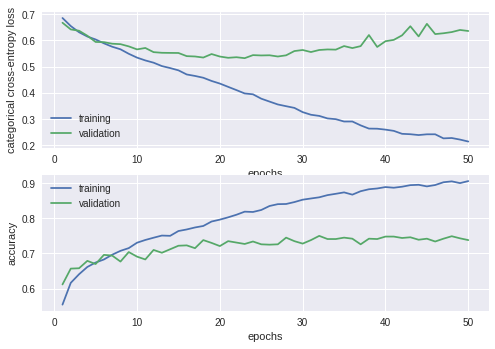

In [7]:
train_val_metrics(50, model1_training)

The model begins to overfit around epoch 20 or so. Early stopping would be useful here.

![something a little deeper](http://www.ryanleeallred.com/wp-content/uploads/2018/06/a-little-deeper.gif)

# Model #2

Lets add an additional set of convolutional->activation->pooling to this model:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)

Again, compile the model using categorical_crossentropy as your loss metric and use the Adam optimizer, and accuracy as your overall scoring metric. 

In [8]:
model2 = Sequential()

model2.add(Conv2D(8, (3,3), activation='relu', input_shape=(3, 32, 32)))
model2.add(Dropout(.25))
model2.add(Conv2D(16, (3,3), activation='relu'))
model2.add(Dropout(.25))
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(16, (3,3), activation='relu', input_shape=(3, 32, 32)))
model2.add(Dropout(.25))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(Dropout(.25))
model2.add(MaxPooling2D((2,2)))

model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))

model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 8, 30, 30)         224       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 30, 30)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 28, 28)        1168      
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 28, 28)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 14, 14)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 12, 12)        2320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 12, 12)        0         
__________

## Fit your model

Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

In [9]:
model2_training = model2.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 2s 217us/step - loss: 0.6927 - acc: 0.5264 - val_loss: 0.6904 - val_acc: 0.5500
Epoch 2/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.6847 - acc: 0.5568 - val_loss: 0.6871 - val_acc: 0.5400
Epoch 3/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.6723 - acc: 0.5896 - val_loss: 0.6825 - val_acc: 0.5470
Epoch 4/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.6583 - acc: 0.6091 - val_loss: 0.6738 - val_acc: 0.5680
Epoch 5/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.6440 - acc: 0.6291 - val_loss: 0.6653 - val_acc: 0.5830
Epoch 6/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.6270 - acc: 0.6439 - val_loss: 0.6216 - val_acc: 0.6670
Epoch 7/50
9000/9000 [==============================] - 1s 159us/step - loss: 0.6081 - acc: 0.6673 - val_loss: 0.6066 - val_acc: 0.6770


9000/9000 [==============================] - 1s 155us/step - loss: 0.5958 - acc: 0.6714 - val_loss: 0.6031 - val_acc: 0.6860
Epoch 9/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.5820 - acc: 0.6912 - val_loss: 0.5829 - val_acc: 0.6890
Epoch 10/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.5675 - acc: 0.6980 - val_loss: 0.5836 - val_acc: 0.6880
Epoch 11/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.5621 - acc: 0.7027 - val_loss: 0.5789 - val_acc: 0.6820
Epoch 12/50
9000/9000 [==============================] - 1s 155us/step - loss: 0.5558 - acc: 0.7118 - val_loss: 0.5580 - val_acc: 0.7200
Epoch 13/50
9000/9000 [==============================] - 1s 158us/step - loss: 0.5462 - acc: 0.7147 - val_loss: 0.5720 - val_acc: 0.6910
Epoch 14/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.5488 - acc: 0.7196 - val_loss: 0.5697 - val_acc: 0.6960
Epoch 15/50
4352/9000 [=============>................]

9000/9000 [==============================] - 1s 156us/step - loss: 0.5342 - acc: 0.7313 - val_loss: 0.5439 - val_acc: 0.7400
Epoch 16/50
9000/9000 [==============================] - 1s 154us/step - loss: 0.5311 - acc: 0.7276 - val_loss: 0.5407 - val_acc: 0.7220
Epoch 17/50
9000/9000 [==============================] - 1s 158us/step - loss: 0.5280 - acc: 0.7350 - val_loss: 0.5437 - val_acc: 0.7280
Epoch 18/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.5143 - acc: 0.7421 - val_loss: 0.5575 - val_acc: 0.7110
Epoch 19/50
9000/9000 [==============================] - 1s 154us/step - loss: 0.5052 - acc: 0.7471 - val_loss: 0.5467 - val_acc: 0.7200
Epoch 20/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.5076 - acc: 0.7481 - val_loss: 0.5300 - val_acc: 0.7250
Epoch 21/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.5010 - acc: 0.7481 - val_loss: 0.5222 - val_acc: 0.7320
Epoch 22/50
4736/9000 [==============>...............

9000/9000 [==============================] - 1s 156us/step - loss: 0.4961 - acc: 0.7553 - val_loss: 0.5075 - val_acc: 0.7500
Epoch 23/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.4906 - acc: 0.7610 - val_loss: 0.5147 - val_acc: 0.7500
Epoch 24/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.4858 - acc: 0.7612 - val_loss: 0.5460 - val_acc: 0.7130
Epoch 25/50
9000/9000 [==============================] - 1s 155us/step - loss: 0.4802 - acc: 0.7694 - val_loss: 0.5307 - val_acc: 0.7180
Epoch 26/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.4779 - acc: 0.7681 - val_loss: 0.5259 - val_acc: 0.7250
Epoch 27/50
9000/9000 [==============================] - 1s 160us/step - loss: 0.4702 - acc: 0.7707 - val_loss: 0.5271 - val_acc: 0.7190
Epoch 28/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.4705 - acc: 0.7723 - val_loss: 0.5302 - val_acc: 0.7260
Epoch 29/50
3968/9000 [============>.................

9000/9000 [==============================] - 1s 156us/step - loss: 0.4594 - acc: 0.7788 - val_loss: 0.5065 - val_acc: 0.7470
Epoch 30/50
9000/9000 [==============================] - 1s 158us/step - loss: 0.4623 - acc: 0.7768 - val_loss: 0.5125 - val_acc: 0.7290
Epoch 31/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.4605 - acc: 0.7800 - val_loss: 0.5066 - val_acc: 0.7500
Epoch 32/50
9000/9000 [==============================] - 1s 158us/step - loss: 0.4518 - acc: 0.7830 - val_loss: 0.4960 - val_acc: 0.7470
Epoch 33/50
9000/9000 [==============================] - 1s 159us/step - loss: 0.4527 - acc: 0.7859 - val_loss: 0.4857 - val_acc: 0.7680
Epoch 34/50
9000/9000 [==============================] - 1s 155us/step - loss: 0.4493 - acc: 0.7803 - val_loss: 0.5080 - val_acc: 0.7400
Epoch 35/50
9000/9000 [==============================] - 1s 159us/step - loss: 0.4467 - acc: 0.7851 - val_loss: 0.5011 - val_acc: 0.7490
Epoch 36/50
4352/9000 [=============>................

9000/9000 [==============================] - 1s 158us/step - loss: 0.4401 - acc: 0.7892 - val_loss: 0.5006 - val_acc: 0.7530
Epoch 37/50
9000/9000 [==============================] - 1s 160us/step - loss: 0.4270 - acc: 0.7991 - val_loss: 0.4891 - val_acc: 0.7690
Epoch 38/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.4374 - acc: 0.7943 - val_loss: 0.4821 - val_acc: 0.7690
Epoch 39/50
9000/9000 [==============================] - 1s 155us/step - loss: 0.4305 - acc: 0.7970 - val_loss: 0.4883 - val_acc: 0.7690
Epoch 40/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.4273 - acc: 0.8007 - val_loss: 0.4809 - val_acc: 0.7620
Epoch 41/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.4295 - acc: 0.8038 - val_loss: 0.4877 - val_acc: 0.7610
Epoch 42/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.4165 - acc: 0.8077 - val_loss: 0.4887 - val_acc: 0.7660
Epoch 43/50
4736/9000 [==============>...............

9000/9000 [==============================] - 1s 156us/step - loss: 0.4146 - acc: 0.8074 - val_loss: 0.4707 - val_acc: 0.7770
Epoch 44/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.4176 - acc: 0.8009 - val_loss: 0.4949 - val_acc: 0.7560
Epoch 45/50
9000/9000 [==============================] - 1s 158us/step - loss: 0.4072 - acc: 0.8082 - val_loss: 0.4881 - val_acc: 0.7510
Epoch 46/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.4011 - acc: 0.8174 - val_loss: 0.4750 - val_acc: 0.7840
Epoch 47/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.4023 - acc: 0.8149 - val_loss: 0.4744 - val_acc: 0.7800
Epoch 48/50
9000/9000 [==============================] - 1s 156us/step - loss: 0.4095 - acc: 0.8087 - val_loss: 0.4687 - val_acc: 0.7910
Epoch 49/50
9000/9000 [==============================] - 1s 157us/step - loss: 0.3963 - acc: 0.8157 - val_loss: 0.4719 - val_acc: 0.7710
Epoch 50/50
5120/9000 [================>.............

9000/9000 [==============================] - 1s 156us/step - loss: 0.4016 - acc: 0.8159 - val_loss: 0.4730 - val_acc: 0.7740


## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

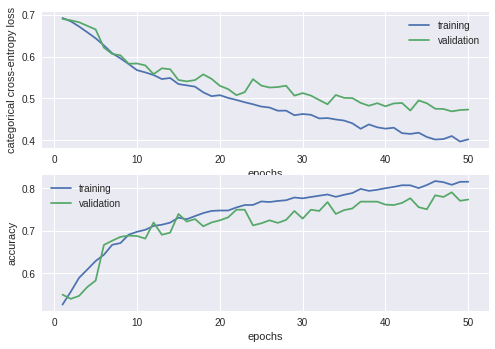

In [10]:
train_val_metrics(50, model2_training)

The model continues to find loss and accuracy improvements, suggesting that it could be trained for more epochs.

![We Need To Go Deeper](http://www.ryanleeallred.com/wp-content/uploads/2018/06/go-deeper.gif)

# Model #3

Finally, one more set of convolutional/activation/pooling:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---

*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)

Again, compile the model using categorical_crossentropy as your loss metric and use the Adam optimizer, and accuracy as your overall scoring metric. 

In [11]:
model3 = Sequential()

model3.add(Conv2D(8, (3,3), activation='relu', input_shape=(3, 32, 32)))
model3.add(Dropout(.25))
model3.add(Conv2D(16, (3,3), activation='relu'))
model3.add(Dropout(.25))
model3.add(MaxPooling2D((2,2), strides=1))

model3.add(Conv2D(16, (3,3), activation='relu', input_shape=(3, 32, 32)))
model3.add(Dropout(.25))
model3.add(Conv2D(32, (3,3), activation='relu'))
model3.add(Dropout(.25))
model3.add(MaxPooling2D((2,2), strides=1))

model3.add(Conv2D(32, (3,3), activation='relu', input_shape=(3, 32, 32)))
model3.add(Dropout(.25))
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(Dropout(.25))
model3.add(MaxPooling2D(2,2))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(2, activation='softmax'))

model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 8, 30, 30)         224       
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 30, 30)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 28, 28)        1168      
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 28, 28)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 27, 27)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 25, 25)        2320      
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 25, 25)        0         
__________

## Fit your model

Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

In [12]:
model3_training = model3.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 4s 405us/step - loss: 0.6998 - acc: 0.5192 - val_loss: 0.6933 - val_acc: 0.4940
Epoch 2/50
9000/9000 [==============================] - 3s 301us/step - loss: 0.6862 - acc: 0.5566 - val_loss: 0.6935 - val_acc: 0.4970
Epoch 3/50
9000/9000 [==============================] - 3s 304us/step - loss: 0.6779 - acc: 0.5866 - val_loss: 0.6897 - val_acc: 0.5170
Epoch 4/50
9000/9000 [==============================] - 3s 301us/step - loss: 0.6667 - acc: 0.6040 - val_loss: 0.6867 - val_acc: 0.5400
Epoch 5/50
9000/9000 [==============================] - 3s 300us/step - loss: 0.6582 - acc: 0.6148 - val_loss: 0.6790 - val_acc: 0.5610
Epoch 6/50
7808/9000 [=========================>....] - ETA: 0s - loss: 0.6455 - acc: 0.6297

9000/9000 [==============================] - 3s 302us/step - loss: 0.6454 - acc: 0.6292 - val_loss: 0.6745 - val_acc: 0.5680
Epoch 7/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.6325 - acc: 0.6394 - val_loss: 0.6772 - val_acc: 0.5810
Epoch 8/50
9000/9000 [==============================] - 3s 300us/step - loss: 0.6225 - acc: 0.6558 - val_loss: 0.6594 - val_acc: 0.6010
Epoch 9/50
9000/9000 [==============================] - 3s 304us/step - loss: 0.6172 - acc: 0.6603 - val_loss: 0.6528 - val_acc: 0.6030
Epoch 10/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.6033 - acc: 0.6747 - val_loss: 0.6675 - val_acc: 0.5920
Epoch 11/50
9000/9000 [==============================] - 3s 298us/step - loss: 0.5966 - acc: 0.6800 - val_loss: 0.6717 - val_acc: 0.5800
Epoch 12/50
2944/9000 [========>.....................] - ETA: 1s - loss: 0.5985 - acc: 0.6749

9000/9000 [==============================] - 3s 300us/step - loss: 0.5862 - acc: 0.6851 - val_loss: 0.6747 - val_acc: 0.5860
Epoch 13/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.5839 - acc: 0.6931 - val_loss: 0.6099 - val_acc: 0.6600
Epoch 14/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.5753 - acc: 0.6994 - val_loss: 0.6127 - val_acc: 0.6450
Epoch 15/50
9000/9000 [==============================] - 3s 303us/step - loss: 0.5609 - acc: 0.7043 - val_loss: 0.5776 - val_acc: 0.6910
Epoch 16/50
9000/9000 [==============================] - 3s 300us/step - loss: 0.5611 - acc: 0.7116 - val_loss: 0.6343 - val_acc: 0.6280
Epoch 17/50
9000/9000 [==============================] - 3s 301us/step - loss: 0.5597 - acc: 0.7060 - val_loss: 0.6260 - val_acc: 0.6330
Epoch 18/50
2432/9000 [=======>......................] - ETA: 1s - loss: 0.5536 - acc: 0.7196

9000/9000 [==============================] - 3s 306us/step - loss: 0.5478 - acc: 0.7189 - val_loss: 0.5964 - val_acc: 0.6670
Epoch 19/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.5373 - acc: 0.7302 - val_loss: 0.6077 - val_acc: 0.6490
Epoch 20/50
9000/9000 [==============================] - 3s 303us/step - loss: 0.5410 - acc: 0.7268 - val_loss: 0.6201 - val_acc: 0.6470
Epoch 21/50
9000/9000 [==============================] - 3s 303us/step - loss: 0.5361 - acc: 0.7308 - val_loss: 0.5902 - val_acc: 0.6700
Epoch 22/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.5333 - acc: 0.7339 - val_loss: 0.5939 - val_acc: 0.6710
Epoch 23/50
9000/9000 [==============================] - 3s 304us/step - loss: 0.5222 - acc: 0.7349 - val_loss: 0.5679 - val_acc: 0.6950
Epoch 24/50
1920/9000 [=====>........................] - ETA: 2s - loss: 0.5065 - acc: 0.7484

9000/9000 [==============================] - 3s 302us/step - loss: 0.5135 - acc: 0.7470 - val_loss: 0.5823 - val_acc: 0.6690
Epoch 25/50
9000/9000 [==============================] - 3s 303us/step - loss: 0.5130 - acc: 0.7452 - val_loss: 0.6011 - val_acc: 0.6510
Epoch 26/50
9000/9000 [==============================] - 3s 303us/step - loss: 0.5061 - acc: 0.7421 - val_loss: 0.6089 - val_acc: 0.6500
Epoch 27/50
9000/9000 [==============================] - 3s 301us/step - loss: 0.4986 - acc: 0.7511 - val_loss: 0.5628 - val_acc: 0.6940
Epoch 28/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.4965 - acc: 0.7550 - val_loss: 0.6168 - val_acc: 0.6330
Epoch 29/50
9000/9000 [==============================] - 3s 304us/step - loss: 0.4882 - acc: 0.7567 - val_loss: 0.5637 - val_acc: 0.6840
Epoch 30/50
2176/9000 [======>.......................] - ETA: 1s - loss: 0.4719 - acc: 0.7734

9000/9000 [==============================] - 3s 301us/step - loss: 0.4829 - acc: 0.7644 - val_loss: 0.6403 - val_acc: 0.6290
Epoch 31/50
9000/9000 [==============================] - 3s 304us/step - loss: 0.4751 - acc: 0.7617 - val_loss: 0.6051 - val_acc: 0.6590
Epoch 32/50
9000/9000 [==============================] - 3s 301us/step - loss: 0.4716 - acc: 0.7721 - val_loss: 0.5500 - val_acc: 0.6890
Epoch 33/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.4764 - acc: 0.7708 - val_loss: 0.5767 - val_acc: 0.6760
Epoch 34/50
9000/9000 [==============================] - 3s 301us/step - loss: 0.4605 - acc: 0.7777 - val_loss: 0.5528 - val_acc: 0.7000
Epoch 35/50
9000/9000 [==============================] - 3s 301us/step - loss: 0.4578 - acc: 0.7792 - val_loss: 0.5409 - val_acc: 0.6990
Epoch 36/50
2176/9000 [======>.......................] - ETA: 1s - loss: 0.4649 - acc: 0.7670

9000/9000 [==============================] - 3s 301us/step - loss: 0.4513 - acc: 0.7799 - val_loss: 0.5614 - val_acc: 0.6960
Epoch 37/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.4598 - acc: 0.7752 - val_loss: 0.5770 - val_acc: 0.6750
Epoch 38/50
9000/9000 [==============================] - 3s 303us/step - loss: 0.4384 - acc: 0.7919 - val_loss: 0.5403 - val_acc: 0.7070
Epoch 39/50
9000/9000 [==============================] - 3s 303us/step - loss: 0.4368 - acc: 0.7907 - val_loss: 0.5123 - val_acc: 0.7300
Epoch 40/50
9000/9000 [==============================] - 3s 301us/step - loss: 0.4311 - acc: 0.7971 - val_loss: 0.5803 - val_acc: 0.6770
Epoch 41/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.4189 - acc: 0.8003 - val_loss: 0.5567 - val_acc: 0.6890
Epoch 42/50
2176/9000 [======>.......................] - ETA: 2s - loss: 0.4096 - acc: 0.8107

9000/9000 [==============================] - 3s 301us/step - loss: 0.4140 - acc: 0.8060 - val_loss: 0.5337 - val_acc: 0.7050
Epoch 43/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.4135 - acc: 0.8067 - val_loss: 0.5499 - val_acc: 0.6930
Epoch 44/50
9000/9000 [==============================] - 3s 301us/step - loss: 0.4031 - acc: 0.8121 - val_loss: 0.5114 - val_acc: 0.7300
Epoch 45/50
9000/9000 [==============================] - 3s 302us/step - loss: 0.4044 - acc: 0.8116 - val_loss: 0.5404 - val_acc: 0.7150
Epoch 46/50
9000/9000 [==============================] - 3s 301us/step - loss: 0.4001 - acc: 0.8103 - val_loss: 0.5862 - val_acc: 0.6790
Epoch 47/50
9000/9000 [==============================] - 3s 300us/step - loss: 0.3904 - acc: 0.8168 - val_loss: 0.5587 - val_acc: 0.6950
Epoch 48/50
2176/9000 [======>.......................] - ETA: 1s - loss: 0.3931 - acc: 0.8130

9000/9000 [==============================] - 3s 300us/step - loss: 0.3917 - acc: 0.8129 - val_loss: 0.5275 - val_acc: 0.7180
Epoch 49/50
9000/9000 [==============================] - 3s 301us/step - loss: 0.3815 - acc: 0.8199 - val_loss: 0.5342 - val_acc: 0.7230
Epoch 50/50
9000/9000 [==============================] - 3s 303us/step - loss: 0.3765 - acc: 0.8294 - val_loss: 0.5396 - val_acc: 0.7230


## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

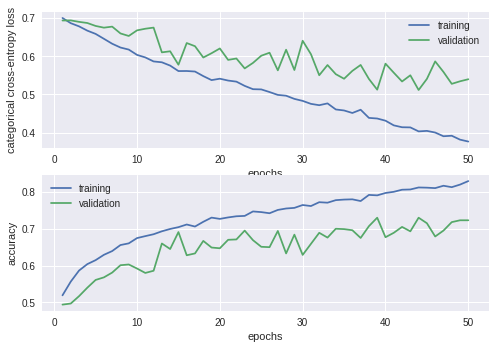

In [13]:
train_val_metrics(50, model3_training)

# Stretch Goal:

## Use other classes from Cifar10
Try using different classes from the Cifar10 dataset or use all 10. You might need to sample the training data or limit the number of epochs if you decide to use the entire dataset due to processing constraints.

## Hyperparameter Tune Your Model
If you have successfully complete shown how increasing the depth of a neural network can improve its accuracy, and you feel like you have a solid understanding of all of the different parts of CNNs, try hyperparameter tuning your strongest model to see how much additional accuracy you can squeeze out of it. This will also give you a chance to research the different hyperparameters as well as their significance/purpose. (There are lots and lots)

---

Here's a helpful article that will show you how to get started using GridSearch to hyperaparameter tune your CNN. (should you desire to use that method):

[Grid Search Hyperparameters for Deep Learning Models in Python With Keras](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)